<h1>Introduction</h1>
<p>In this experiment, we will be running tests on various caching strategies. Their functionalities are described below.</p>
<h3>Memory/No Cache</h3>
<p>In this strategy, no cache is implemented, every memory lookup requires a memory access/hit. In this experiment, this would prove to be the baseline of comparison for other caching strategies.</p>
<h3>Cyclic Cache</h3>
<p>In this strategy, the cache is implemented as a queue-like structure since it follows the First-In-First-Out rule, also known as FIFO. In this caching method, if the element that we are looking for is found in the cache, we return it. If it is not, we dequeue the element at the start of the queue, access memory to fetch the element and add the element to the end of the queue.</p>
<h3>Least Recently Used Cache</h3>
<p>This caching method is also known as LRU in short. In this strategy, we could either use a 2D list or a combination of a dictionary and a list. The essence of its implementation is that if an element exists in the cache, we return it and change the ordering of the cache so that the element we just accessed is moved to the end of the list to signify that it is the most recently used address. If it is not found in the cache, we access memory to fetch it. After doing so, if the cache is full, we remove the first element of the list, which according to our implementation would be the least recently used address since the most recently used is located at the end of the list. After this, we add the address at the end of the list, again to signify that this was the most recently used element.</p>
<h3>Random Cache</h3>
<p>As the name suggests, this caching method evicts elements from the cache at random when the cache is full. It would be interesting to see how effective this strategy will prove to be as compared to the other ones.</p>

<p>Through our experiments, we will try to answer the following questions about the various caching strategies:</p>
<ul>
    <li>How often does a lookup result in memory access?</li>
    <li>Are there differences between the behaviour of the strategies?</li>
</ul>

<p>I intend on answering these questions by testing how well the strategies perform under test cases of various sizes and spreads.</p>

<h2>Experiment</h2>

<p>Let's start by first importing the caching strategies and some other libraries that we will be using for data analysis and visualisation.</p>

In [15]:
from memory import Memory, CyclicCache, LRUCache, RandomCache
import pandas as pd
import matplotlib.pyplot as plt

<h3>Test Cases</h3>
<p>We need to start by writing a function that can generate a random test case that each of the caching strategies can be tested against. The function should take as input the range of the data and its size. The closer together the data, the more the repetitions, and the more cache accesses we should have. We can then experiment the strategies under various test cases of different sizes and spreads.</p>

In [16]:
import random
def generate_test_case(start, end, size):
    test_case = [random.randint(start, end) for _ in range(size)]
    return test_case
generate_test_case(0, 10, 10)

[0, 5, 1, 8, 9, 8, 6, 0, 3, 3]

<h3>Evaluation</h3>
<p>We need a function that can evaluate a provided test case against each of the caching strategies that we are comparing and return to us the get_hit_count value for each of them.</p>
<p>Additionally, I have also taken the decision to suppress the print statements in the Memory file from here since they are being a bit distracting.</p>

In [17]:
def evaluate(test_case):
    # run the provided test_case against each of the strategies
    scores = {}
    strategies = [Memory(), LRUCache(), CyclicCache(), RandomCache()]
    #mem = Memory()
    for strategy in strategies:
        for datum in test_case:
            strategy.lookup(datum)
        scores[strategy.name()] = strategy.get_hit_count()
    return scores

<h3>Testing</h3>
<p>Now we need to start generating test cases using the function we made. The tests need to be of various sizes and cover different spreads. For each of the following tests, we will generate 100 random test cases since I think that a large sample size would give us a better idea.</p>

In [18]:
repetitions = 100
generate_test_cases = lambda start, end, size: [generate_test_case(start, end, size)
                                               for _ in range(repetitions)]

<h4>Evenly Spread Out data</h4>
<p>We will start by testing the strategies against test cases of a small size over a small range/spread. In this case, we would expect the produced test cases to be evenly spread out since we are assigning the size to be the same as the number of elements in the range.</p>

In [53]:
s_s_test_cases = generate_test_cases(0, 9, 10)
# overall_scores denotes the sum of the scores for each strategy
s_s_overall_scores = {'Cyclic': 0,
                  'LRU':0,
                  'Memory': 0,
                  'Random': 0}
for test_case in s_s_test_cases:
    scores = evaluate(test_case)
    for key in scores.keys():
        s_s_overall_scores[key] += scores[key]

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

In [54]:
print(s_s_overall_scores)

{'Cyclic': 692, 'LRU': 689, 'Memory': 1000, 'Random': 695}


<p>Here we can see that all 3 of the caching strategies performed managed to reduce roughly 30% of the memory accesses. In this case, it would be difficult to say for certain which caching strategy is the best since they all have similar values. However, at face value LRU appears to be the best. Compared to Memory, each of the strategies appears to have performed considerably well.</p>
<p>Let's put this data in a dataframe that we can then later visualise as a graph.</p>

In [66]:
ss_df = pd.DataFrame(s_s_overall_scores, index=['Score']).transpose()
ss_df

,Score
Cyclic,692
LRU,689
Memory,1000
Random,695


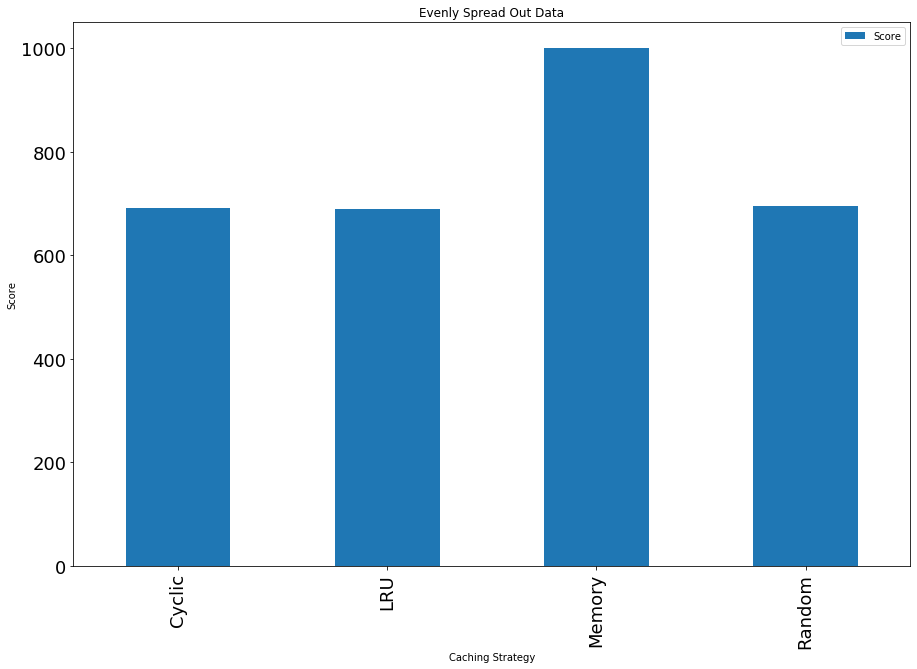

In [60]:
ax = ss_df.plot(kind='bar',
             title='Evenly Spread Out Data',
             figsize=(15,10),
            legend=True,
            fontsize=18)
ax.set_xlabel("Caching Strategy")
ax.set_ylabel("Score")
plt.show()

<h4>Denser data</h4>
<p>Now we will test a larger size of test_cases but over a smaller range. Due to this, the data would be closer together statistically, and we would expect fewer memory hits from each of the caching strategies (except for Memory, of course). I will take the size to be 50 times the range for this test.</p>

In [61]:
l_s_test_cases = generate_test_cases(0, 9, 500)
# overall_scores denotes the sum of the scores for each strategy
l_s_overall_scores = {'Cyclic': 0,
                  'LRU':0,
                  'Memory': 0,
                  'Random': 0}
for test_case in l_s_test_cases:
    scores = evaluate(test_case)
    for key in scores.keys():
        l_s_overall_scores[key] += scores[key]

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

In [62]:
print(l_s_overall_scores)
ls_df = pd.DataFrame(l_s_overall_scores, index=['Score']).transpose()
ls_df

{'Cyclic': 29999, 'LRU': 29960, 'Memory': 50000, 'Random': 30112}


,Score
Cyclic,29999
LRU,29960
Memory,50000
Random,30112


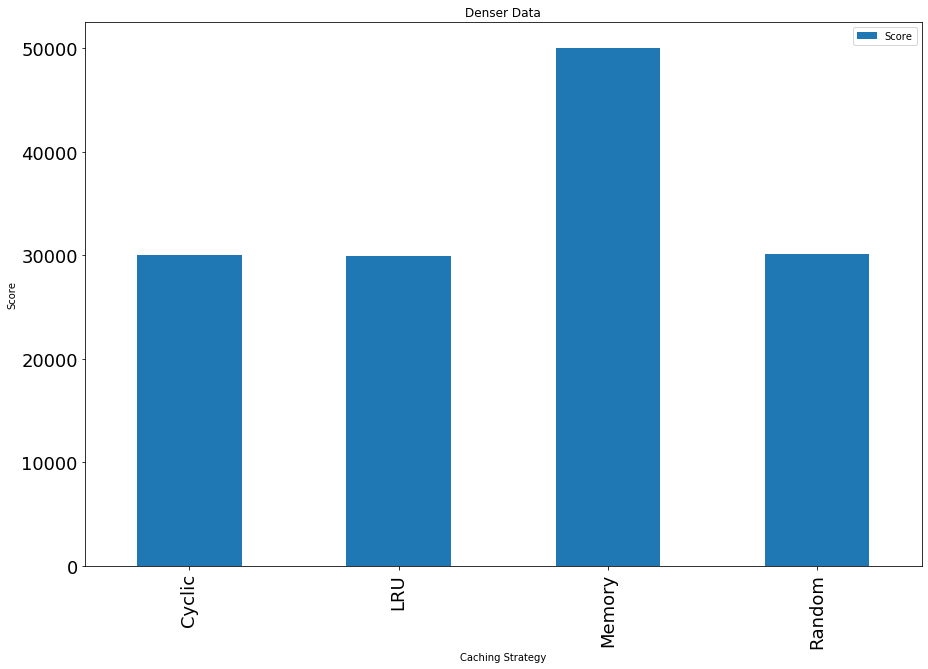

In [65]:
ax = ls_df.plot(kind='bar',
             title='Denser Data',
             figsize=(15,10),
            legend=True,
            fontsize=18)
ax.set_xlabel("Caching Strategy")
ax.set_ylabel("Score")
plt.show()

<p>For this test, I initially started with 20 for the size of the test cases and gradually kept on increasing it because the values for Cyclic, LRU, and Random just appeared to be really close, making it difficult to draw any real conclusions. With a size of 500, there finally appears to be enough of a difference to not some observations. LRU has done better compared to the others, similarly to the previous test. As a matter of fact, the rankings for the caching strategies have remained the same, with Random performing the worst out of the three. Compared to Memory, each of the caching strategies has done better than they did in the previous test (small size over a small range). In the previous test, they managed to reduce the hit counts by roughly 30% while here it is almost 40%. It appears that the caching strategies perform better for denser data.</p>

<h4>Sparsely Spread Out Data</h4>
<p>Now we will test a larger spread of data, but we will keep the test case size small to ensure that the data is sparsely spread out. I would expect a higher number of memory hits in this case since the chances of data repetition in the test cases would be lower.</p>

In [74]:
s_l_test_cases = generate_test_cases(0, 19, 5)
# overall_scores denotes the sum of the scores for each strategy
s_l_overall_scores = {'Cyclic': 0,
                  'LRU':0,
                  'Memory': 0,
                  'Random': 0}
for test_case in s_l_test_cases:
    scores = evaluate(test_case)
    for key in scores.keys():
        s_l_overall_scores[key] += scores[key]

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

In [72]:
print(s_l_overall_scores)
sl_df = pd.DataFrame(s_l_overall_scores, index=['Score']).transpose()
sl_df

{'Cyclic': 449, 'LRU': 449, 'Memory': 500, 'Random': 449}


,Score
Cyclic,449
LRU,449
Memory,500
Random,449


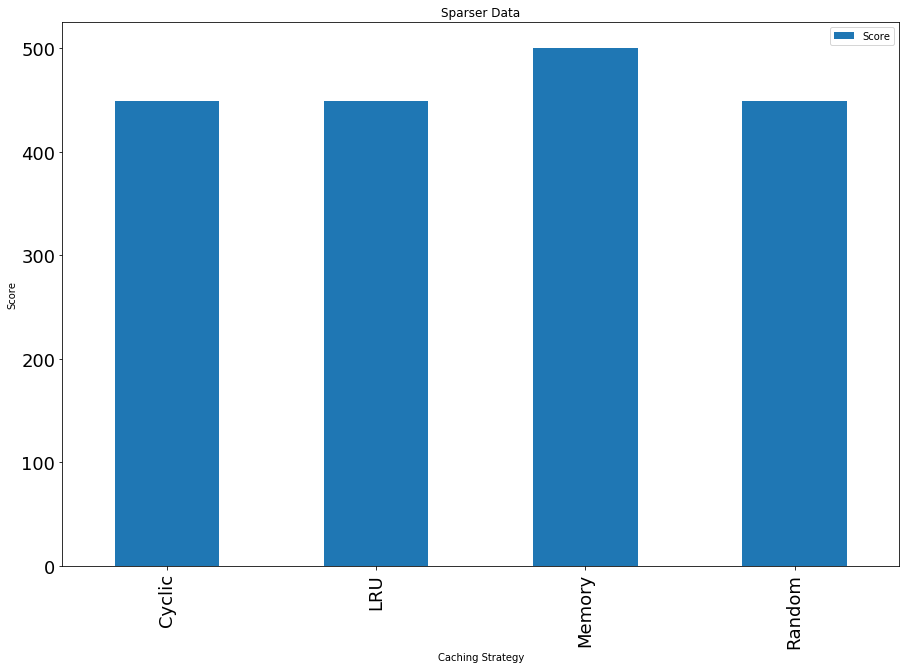

In [73]:
ax = sl_df.plot(kind='bar',
             title='Sparser Data',
             figsize=(15,10),
            legend=True,
            fontsize=18)
ax.set_xlabel("Caching Strategy")
ax.set_ylabel("Score")
plt.show()

I ran the code cells for this test five times, and each time the results for the three caching strategies were exactly the same. It seems like roughly 10% of the requests result in a cache hit, and the rest 90% are memory hits in this test.

<h3>Run Time</h3>
<p>In addition to the tests above, I am also interested in finding out the amount of time each caching strategy takes in general. For this the dataset of tests that I will use is the denser one, because it would require a larger proportion of cache accesses resulting in more algorithmic operations. For the purposes of this test, I will use the same randomly generated test cases for each caching strategy 10 times, find the average time, and compare them.</p>

In [82]:
import time
def time_test(strategy, test_data, reps=10):
    times = []
    for _ in range(reps):
        start_time = time.time()
        for test_case in test_data:
            for datum in test_case:
                strategy.lookup(datum)
        end_time = time.time()
        times.append(end_time - start_time)
    return sum(times)/len(times)

In [85]:
test_data = generate_test_cases(0, 9, 50)
mem_time = time_test(Memory(), test_data)
lru_time = time_test(LRUCache(), test_data)
cyclic_time = time_test(CyclicCache(), test_data)
random_time = time_test(RandomCache(), test_data)

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

 Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memor

Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory Access Memory

In [86]:
print(mem_time)
print(lru_time)
print(cyclic_time)
print(random_time)

1.3238240957260132
0.8064046144485474
0.8447134971618653
0.8023356437683106


<p>Over here we can see that Memory seems to be taking the longest amount of time, I suspect it is because of the print statements within its lookup function. Ignoring this, the implementation of LRU appears to be quicker than Cyclic, which is not what I was personally expecting. Also, Random seems to be the most efficient one since it has the fewest number of operations in its lookup function implementation.<p>

<h2>Conclusion</h2>
<p>In conclusion, it appears that LRU is the most effective strategy to use, but we cannot say for certain, since the values for the strategies do not vary by a large amount. It is possible that for a different test case set either Cyclic or Random would perform better. One thing that we can say for certain is that utilising any caching strategy at all, even a simple Random one, results in a more efficient memory setup and requires fewer memory lookups. It also appears that the strategies become more efficient as the number of repetitions in the data get larger (i.e. the dataset is denser).</p>